--------------------------
#### KNN as regressor
---------------------------

In [35]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor

In [36]:
# Generate dummy data for linear regression
np.random.seed(42)
X_train = np.random.rand(200, 2) * 10  # 200 samples, 2 features
y_train = 2 * X_train[:, 0] + 3 * X_train[:, 1] + np.random.normal(0, 1, 200)  # Linear relationship with noise

In [38]:
# Create KNeighborsRegressor with n_neighbors=5
knn_regressor = KNeighborsRegressor(n_neighbors=5, weights='distance')

In [39]:
# Fit the model
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(weights='distance')

In [41]:
# Generate random test data
X_test = np.random.rand(1, 2) * 10  # 1 test point

In [42]:
# Make prediction
prediction = knn_regressor.predict(X_test)

In [43]:
# Get indices of nearest neighbors
distances, indices = knn_regressor.kneighbors(X_test)

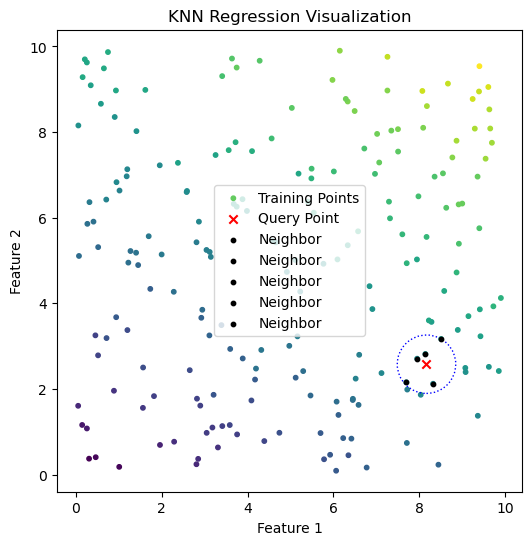

Query Point: [[8.17072071 2.57902827]]
KNN Regression Prediction: [24.10738809]


In [44]:
plt.figure(figsize=(6, 6))
# Scatter plot of training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=10, cmap='viridis', label='Training Points')
plt.scatter(X_test[:, 0],  X_test[:, 1], marker='x', color='red', label='Query Point')

# Circle around query point representing neighbors
circle = plt.Circle((X_test[0, 0], X_test[0, 1]), max(distances[0]), fill=False, color='blue', linestyle='dotted')
plt.gca().add_patch(circle)

# Scatter plot of neighbors with distances and weights
for neighbor_idx, distance in zip(indices[0], distances[0]):
    plt.scatter(X_train[neighbor_idx, 0], X_train[neighbor_idx, 1], marker='o', s=10, color='k', label='Neighbor')
    
plt.title('KNN Regression Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

print(f"Query Point: {X_test}")
print(f"KNN Regression Prediction: {prediction}")

In [34]:
# Print distances and weights
for neighbor_idx, distance in zip(indices[0], distances[0]):
    weight = 1 / distance
    print(f"Neighbor at index {neighbor_idx}:")
    print(f"  Distance: {distance:.2f}")
    print(f"  Weight: {weight:.2f}")
    print("")

Neighbor at index 189:
  Distance: 0.24
  Weight: 4.15

Neighbor at index 154:
  Distance: 0.25
  Weight: 3.93

Neighbor at index 6:
  Distance: 0.48
  Weight: 2.08

Neighbor at index 148:
  Distance: 0.63
  Weight: 1.58

Neighbor at index 126:
  Distance: 0.68
  Weight: 1.47



#### Key points:

- where is linearity?
- where is normal distribution?
- what about homeschedascity?

- Data is completely random and non-linear !!!!

In such cases, KNN can be a very good choice
    